**SUPPORT VECTOR MACHINE**

**1. Commonly used for classification and regression tasks. Useful for higher dimensional data and both linear & non-linear relationships.**

**2. It aims to find a hyper-plane that most effectively seeprates the feature classes while at the same time maximizing the margin. (hyperplane and nearest features)**

**3. It handles non-linear decision boundaries by mapping input features to a higher dimension using a kernel function.**

**Advantages and Disadvantages:**

**1. Performs well in high-dimensionality spaces**

**2. Able to handle non-linear relationships**

**3. Effective against over-fitting mainly due to maximizing margin from the hyperplane**

**4. They can be computationally intensive especially for large datasets**

**5. Tuning of several parameters can be difficult and sensitive to noise from outliers as the hyperplane positioning is based off the points**

**6. Does not provide much information regarding the relation between features and target, just the predicted output is obtained**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("D:/Code/Python Projects/MNIST Handwriting/Data/train.csv")

In [4]:
test = pd.read_csv("D:/Code/Python Projects/MNIST Handwriting/Data/test.csv")

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y=train['label']
X=train.drop('label',axis=1)
x_for_test_data=test[:]

3


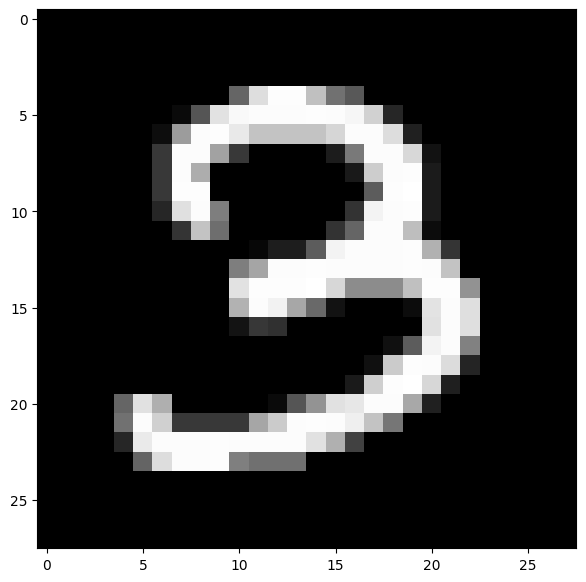

In [8]:
import random
plt.figure(figsize=(7,7))
some_digit=random.randint(0,50)
some_digit_image = X.iloc[some_digit].to_numpy().reshape(28, 28)
plt.imshow(np.reshape(some_digit_image, (28,28)), cmap=plt.cm.gray)
print(y[some_digit])

In [11]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [ ]:
#HERE TEST SIZE IS TAKEN AS 0.5 (50%) BECAUSE CPU AND MEMORY STARTS TO BOTTLENECK WITH 80% TRAINING SET AND COMPLEX HYPERPLANE DEVELOPMENT

In [12]:
from sklearn import svm
classifier = svm.SVC(kernel='linear',C=10,random_state = 0) 
classifier.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=0)

In [13]:
y_prediction = classifier.predict(X_test)
y_prediction

array([8, 1, 9, ..., 1, 9, 9], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy of given model is:",round(accuracy_score(y_test, y_prediction)*100,3),"%")

Accuracy of given model is: 90.767 %


In [15]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2052
           1       0.95      0.98      0.96      2330
           2       0.88      0.91      0.90      2096
           3       0.87      0.87      0.87      2222
           4       0.90      0.93      0.92      2053
           5       0.87      0.86      0.86      1833
           6       0.96      0.94      0.95      2079
           7       0.92      0.92      0.92      2191
           8       0.89      0.84      0.87      2062
           9       0.88      0.85      0.86      2082

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91      0.91      0.91     21000



In [16]:
cm = confusion_matrix(y_test, y_prediction)
cm

array([[2010,    0,    6,    3,    4,   14,    9,    0,    6,    0],
       [   1, 2277,    9,    4,    1,    3,    3,    6,   24,    2],
       [  20,   27, 1908,   34,   30,    4,   24,   12,   33,    4],
       [  10,   12,   76, 1926,    3,  101,    3,   10,   58,   23],
       [   7,    8,   23,    4, 1912,    2,    8,   12,    1,   76],
       [  23,    7,   19,  103,   11, 1570,   28,    2,   52,   18],
       [  35,    6,   30,    1,   14,   30, 1949,    4,    9,    1],
       [   4,    7,   30,   13,   23,    1,    0, 2005,    6,  102],
       [  17,   45,   52,   92,   12,   69,   12,   11, 1742,   10],
       [  10,    9,   12,   34,  113,   11,    0,  111,   20, 1762]],
      dtype=int64)

<Axes: >

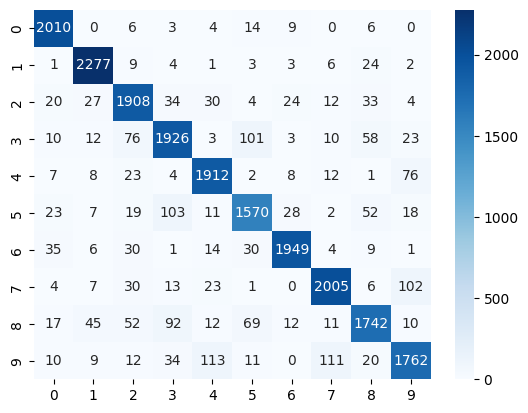

In [17]:
sns.heatmap(cm, annot=True, fmt='d', cbar=True, cmap='Blues')

**Accuracy of given model is: 90.767 %**